# HW4. Support Vector Machines
Madhu Kiran Chiti - 801333676 - ECGR_5105

In [1]:
# Standard Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models Used:
from sklearn.svm import SVC
from sklearn.svm import SVR

# Data Preparation:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA

# Data:
from sklearn.datasets import load_breast_cancer as cancer_dataset
housing_dataset = pd.read_csv("C://Users//Madhu Kiran//Downloads//ML//Assignments//Datasets//Housing (1).csv")

## Problem 1: SVM classifier

In [2]:
# Set up
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_dataset().data, cancer_dataset().target, test_size = 0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linear_model = SVC(kernel = 'linear')
rbf_model = SVC(kernel = 'rbf')
poly_model = SVC(kernel = 'poly')

models = {linear_model, rbf_model, poly_model}

K = np.arange(1, 20, 1)
plot_num = 0

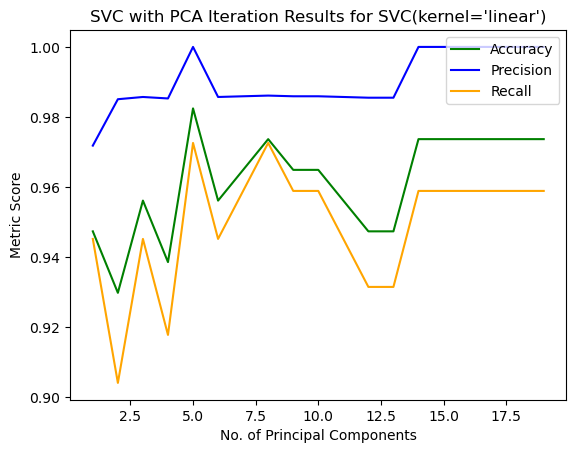

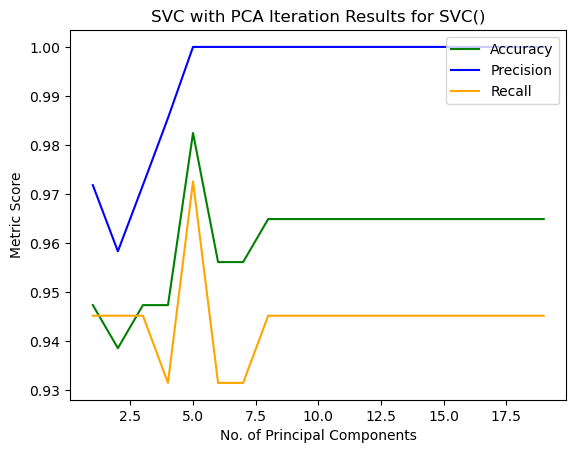

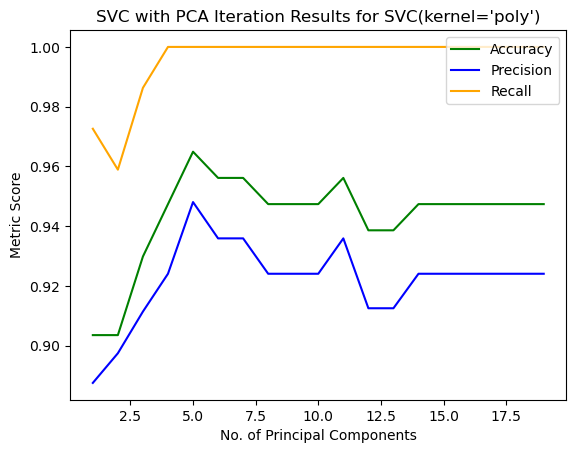

In [3]:
for j in models:
    model = j
    accuracy = []
    precision = []
    recall = []
    for i in K:
        pca = PCA(n_components = i, random_state = 0)
        X_train_PCA = pca.fit_transform(X_train)
        X_test_PCA = pca.transform(X_test)

        model.fit(X_train_PCA, Y_train)
        expected = Y_test
        predicted = model.predict(X_test_PCA)

        accuracy.append(metrics.accuracy_score(expected, predicted))
        precision.append(metrics.precision_score(expected, predicted))
        recall.append(metrics.recall_score(expected, predicted))
    
    plt.figure(plot_num)
    plt.plot(K, accuracy, color = 'green', label = 'Accuracy')
    plt.plot(K, precision, color = 'blue', label = 'Precision')
    plt.plot(K, recall, color = 'orange', label = 'Recall')
    plt.xlabel('No. of Principal Components')
    plt.ylabel('Metric Score')
    leg = plt.legend(loc = 'upper right')
    plt.title('SVC with PCA Iteration Results for '+ str(j))
    
    plot_num += 1

## Problem 2: SVR Regression Model
Housing Dataset Categories: Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [4]:
# Binary mapping Yes and No to 1 and 0
colToMap = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

housing_dataset[colToMap] = housing_dataset[colToMap].apply(binary_map)
housing_dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [5]:
categories = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]
housing_data = housing_dataset[categories]

housing_target = housing_dataset["price"]

In [6]:
# Set up
X_train, X_test, Y_train, Y_test = train_test_split(housing_data, housing_target, test_size = 0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)

Y_train = scaler.fit_transform(Y_train).ravel()
Y_test = scaler.transform(Y_test).ravel()

linear_model = SVR(kernel = 'linear', gamma = 'auto', C = 100)
rbf_model = SVR(kernel = 'rbf', gamma = 'auto', C = 1000)
poly_model = SVR(kernel = 'poly', gamma = 'auto', C = 1000)

K = np.arange(1, 11, 1)
plot_num = 0

models = {linear_model, rbf_model, poly_model}

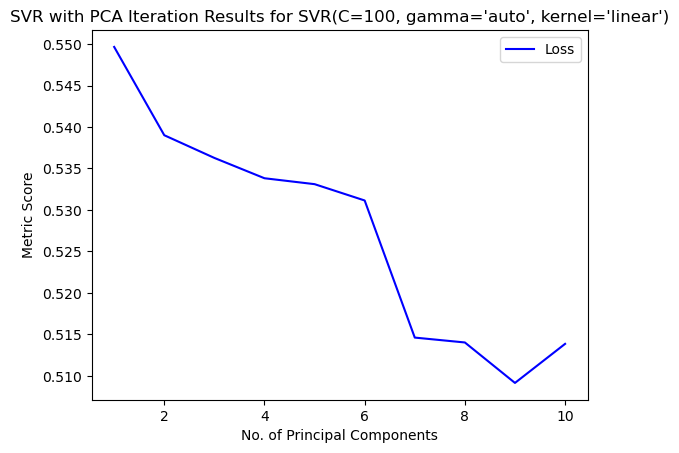

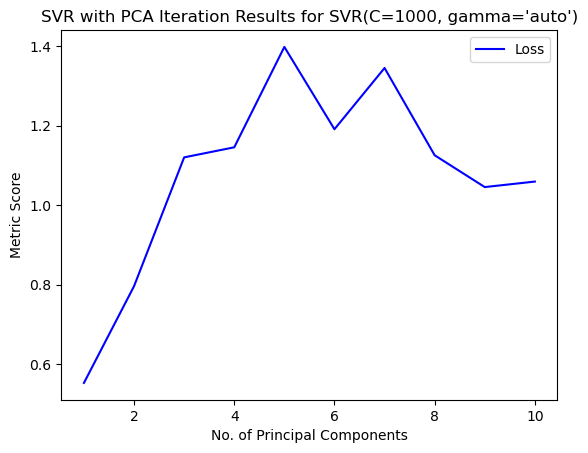

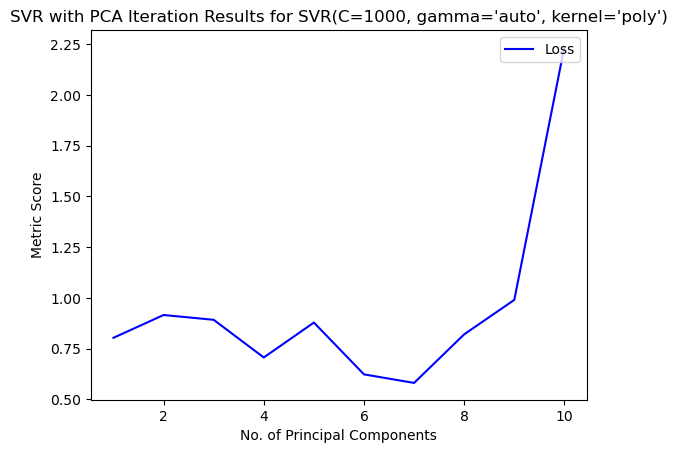

In [7]:
for j in models:
    model = j
    loss = []
    
    for i in K:
        pca = PCA(n_components = i, random_state = 0)
        X_train_PCA = pca.fit_transform(X_train)
        X_test_PCA = pca.transform(X_test)

        model.fit(X_train_PCA, Y_train)

        expected = Y_test
        predicted = model.predict(X_test_PCA)
        loss.append(metrics.mean_squared_error(expected, predicted, squared = False))
        
    
    plt.figure(plot_num)
    plt.plot(K, loss, color = 'blue', label = 'Loss')
    
    plt.xlabel('No. of Principal Components')
    plt.ylabel('Metric Score')
    leg = plt.legend(loc='upper right')
    plt.title('SVR with PCA Iteration Results for ' + str(model))
    
    plot_num += 1